# OpenCV Basics

Before we jump into any advanced material, let's quickly recap the basics:

1. Reading an image
2. Writing an image
3. Corner Detection
4. Edge Detection
5. Color Transforms
6. Image Rotation

In [1]:
if 'google.colab' in str(get_ipython()):
    print("Downloading Code to Colab Environment")
    !wget https://www.dropbox.com/sh/w7olcpz2g812uj4/AADhDGMzi3QuFnmXX4rKmV0Ua?dl=1 -O code.zip -q --show-progress
    !unzip -qq code.zip
else:
    pass

code.zip            100%[===================>]   3.60M  10.3MB/s    in 0.4s    
mapname:  conversion of  failed


# Reading an Image
![Board](https://github.com/bigvisionai/upgrad_alumni_workshop_day1/blob/main/OpenCV_Basics/board.jpg?raw=1)

In [2]:
# Import required modules
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Use imread function to read image
img = cv2.imread("board.jpg")

In [6]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

# Writing an Image

In [7]:
# Use imwrite function to write image
cv2.imwrite("board_new.jpg",img)

True

In [8]:
# Check if file has been written to the location
!ls board*

board_corners.jpg  board.jpg  board_new.jpg


# Harris Corner Detection

OpenCV has the function **`cv2.cornerHarris()`** for detecting corners in an image. Its arguments are:

- **img** - Input image, it should be grayscale and float32 type.
- **blockSize** - It is the size of neighbourhood considered for corner detection
- **ksize** - Aperture parameter of Sobel derivative used.
- **k** - Harris detector free parameter in the equation.

True

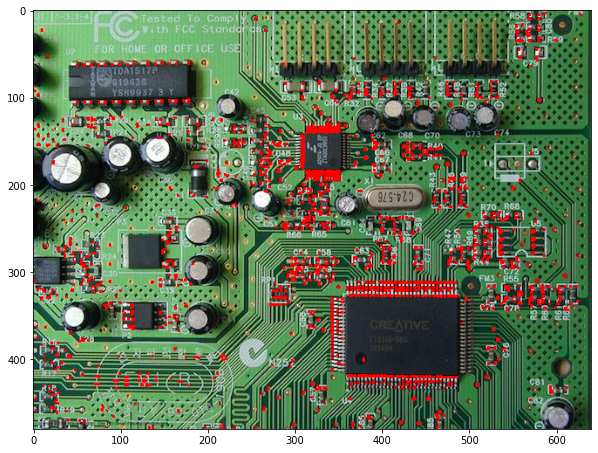

In [9]:
# Create a copy of image
img_copy = img.copy()

# Convert image to grayscale
gray = cv2.cvtColor(img_copy,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
# Detect corners in image
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners
dst = cv2.dilate(dst,None)

img_copy[dst>0.1*dst.max()]=[0,0,255]

plt.imshow(img_copy[:,:,::-1])

# Save image
cv2.imwrite("board_corners.jpg",img_copy)

# Canny Edge Detection

The full sequence of Canny Edge Detection comprises of the following steps:

1. Grayscale Conversion
2. Gaussian Blur
3. Gradient Calculation
4. Non Maximum Suppression
5. Double Thresholding
6. Edge Tracking by Hysteresis

Luckily, OpenCV has its own function (**`cv2.Canny()`**) for Canny Edge Detection.

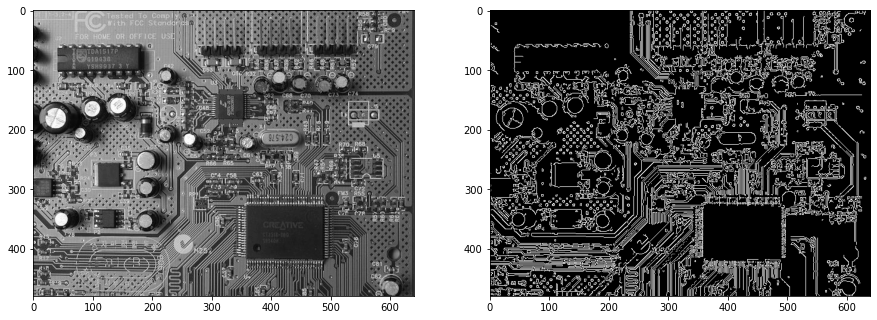

In [15]:
# Convert image to grayscale
gray = cv2.cvtColor(img_copy,cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray,200,600)

plt.figure(figsize=[15,10])
plt.subplot(121)
plt.imshow(gray)
plt.subplot(122)
plt.imshow(edges)

# Color Transforms

We can use OpenCV's **`cv2.cvtColor()`** function to transform the color space of an image. Some of the important color spaces are:

1. RGB color space: Red, Green and Blue
2. HSV color space: Hue, Saturation and Value
3. Grayscale

Note that OpenCV uses **BGR** color space rather than **RGB**.

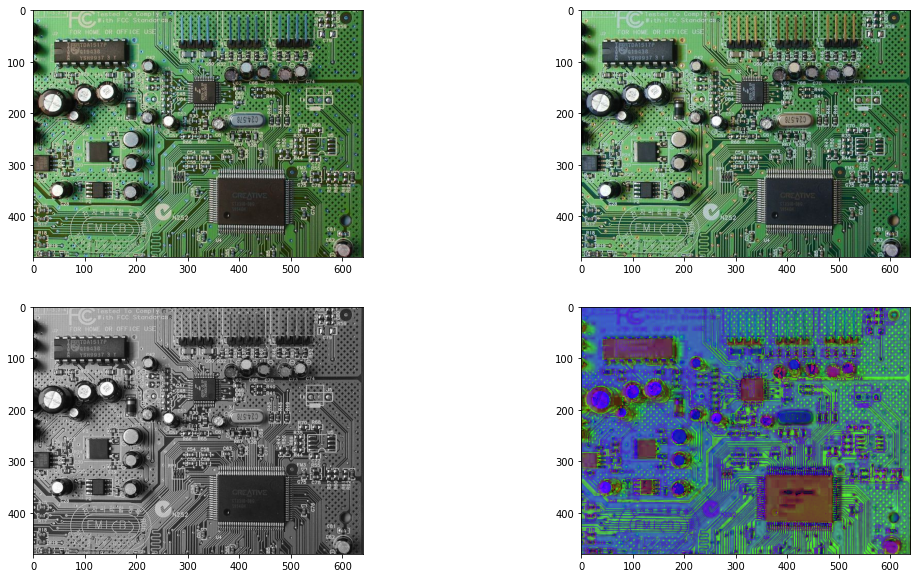

In [11]:
fig = plt.figure(figsize=(18,10))

# Original image
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img)

# Convert image to RGB
rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
ax1 = fig.add_subplot(2,2,2)
ax1.imshow(rgb)

# Convert image to grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ax1 = fig.add_subplot(2,2,3)
ax1.imshow(gray)

# Convert image to HSV color space
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
ax1 = fig.add_subplot(2,2,4)
ax1.imshow(hsv)

plt.show()

# Image Rotation

Rotation is a simple Euclidean transform. In OpenCV, we can rotate images about any point ( let’s call it center ) and by an angle ( let’s simply call this angle ).

In OpenCV, a rotation is represented as a 2x3 Matrix because rotations belong to the special class of transforms called the Affine Transform which is covered in the next section.

The **getRotationMatrix2D** function is used to get the matrix which will define the rotation.

The parameters for the function is

**`rotMat = getRotationMatrix2D(center, angle, scale)`**

[[   0.8660254    -0.5         162.87187079]
 [   0.5           0.8660254  -127.84609691]]


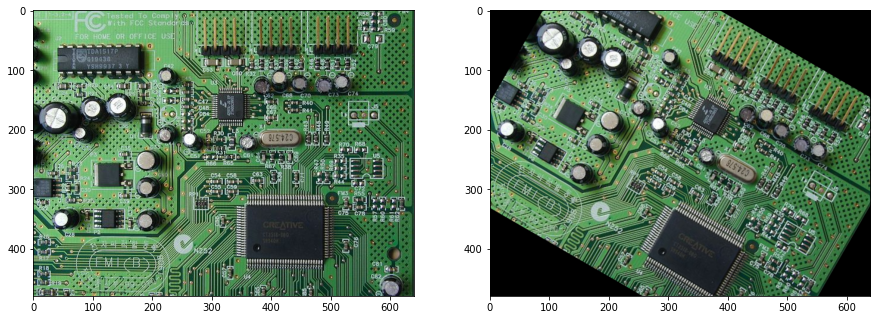

In [12]:
# Getting the dimesnions of the image
dim = img.shape

# Rotating the image by -30 degrees about the center
# dim[0] stores the no of rows and dim[1] no of columns
rotationAngle = -30
scaleFactor = 1

# Rotation matrix
rotationMatrix = cv2.getRotationMatrix2D((dim[1]/2, dim[0]/2), rotationAngle, scaleFactor)

print(rotationMatrix)

result = cv2.warpAffine(img, rotationMatrix, (dim[1],dim[0]))

plt.figure(figsize=[15,10])
plt.subplot(121)
plt.imshow(img[:,:,::-1])
plt.subplot(122)
plt.imshow(result[:,:,::-1])

# Thank You!